# Predicting Customer Churn 
___

### Objective: Predict customer churn in the telecommunications Industry. 

Preventing customer attrition, or churn, is a common business objective. Losing customers results in direct revenue loss, as well as the expenditure of resources to continually find new customers. Brands across all industries are looking for ways to build meaningful bonds with their customers in order to keep them engaged and loyal to the company. In the telecommunications industry, it's a particularly challenging problem as customers in most markets have access to several options.  

### The dataset: [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn/home) 

The Telco Customer Churn dataset contains customer information from a telecommunications company. It includes general demographic information about the customer as well as the various services they were using. It was published by IBM in 2015. 
The raw data contains  7043 rows and 21 columns, with each row being a customer. The target variable is **Churn**, whether or not the customer left the company in the last 30 days.  

In [57]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.naive_bayes import BernoulliNB
from sklearn import preprocessing
from sklearn import tree
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import time

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set_style('white')

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

# Exploratory Data Analysis

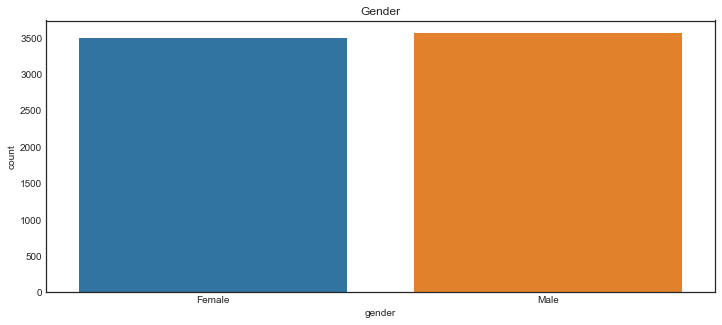

In [6]:
plt.figure(figsize=(12,5))
sns.countplot(x="gender", data=df);
plt.title('Gender')


plt.show()

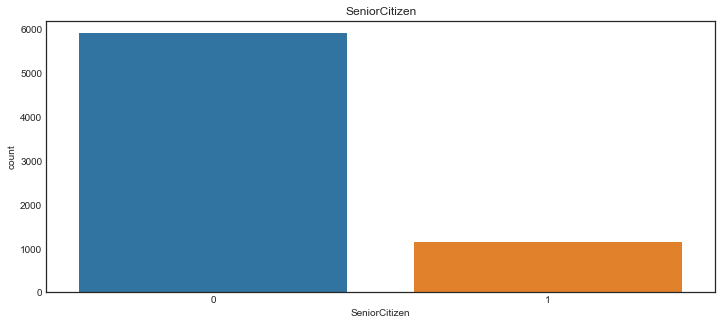

In [7]:
plt.figure(figsize=(12,5))
sns.countplot(x="SeniorCitizen", data=df);
plt.title('SeniorCitizen')


plt.show()

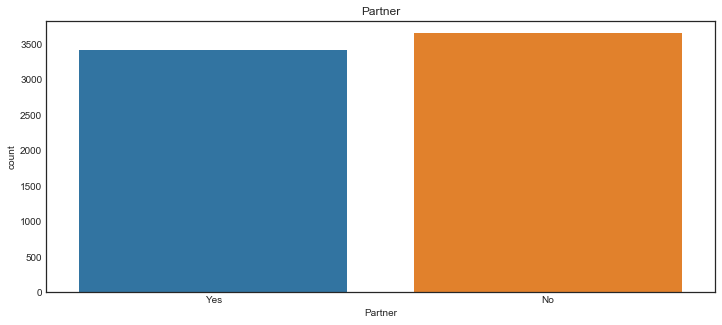

In [8]:
plt.figure(figsize=(12,5))
sns.countplot(x="Partner", data=df);
plt.title('Partner')


plt.show()

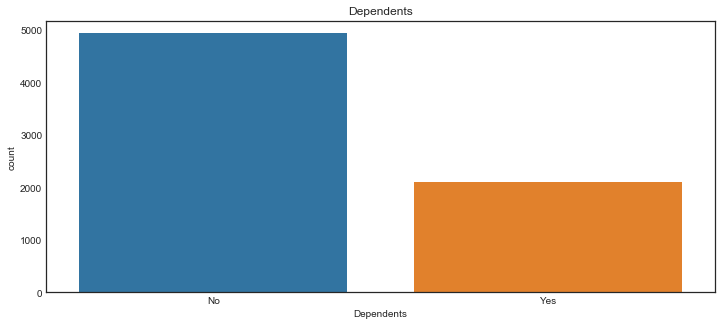

In [9]:
plt.figure(figsize=(12,5))
sns.countplot(x="Dependents", data=df);
plt.title('Dependents')


plt.show()

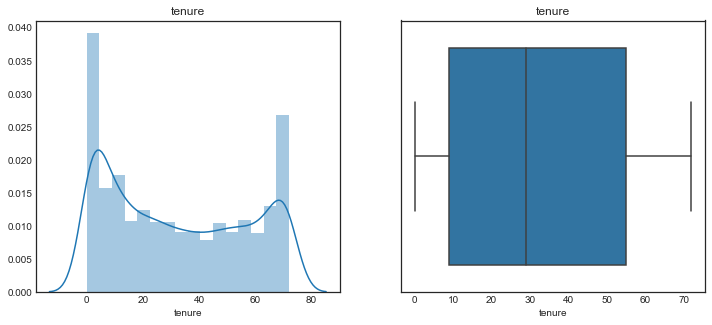

In [10]:
#number of months customer has been with the company
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['tenure'])
plt.title('tenure')

plt.subplot(1, 2, 2)
sns.boxplot(df['tenure'])
plt.title('tenure')

plt.show()

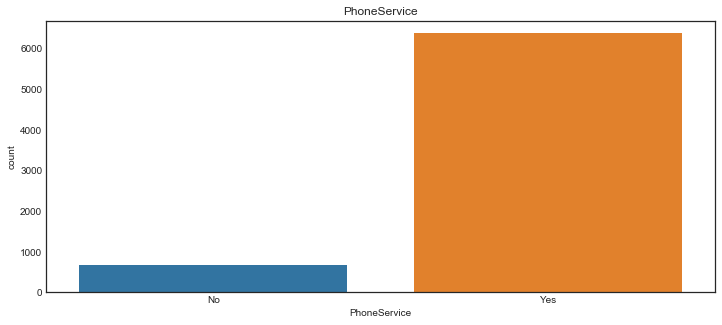

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(x="PhoneService", data=df);
plt.title('PhoneService')


plt.show()

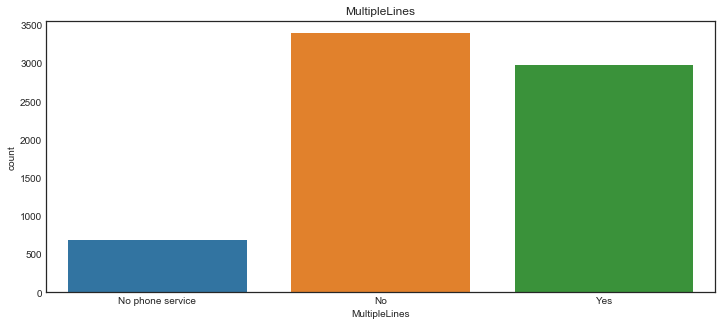

In [12]:
plt.figure(figsize=(12,5))
sns.countplot(x="MultipleLines", data=df);
plt.title('MultipleLines')


plt.show()

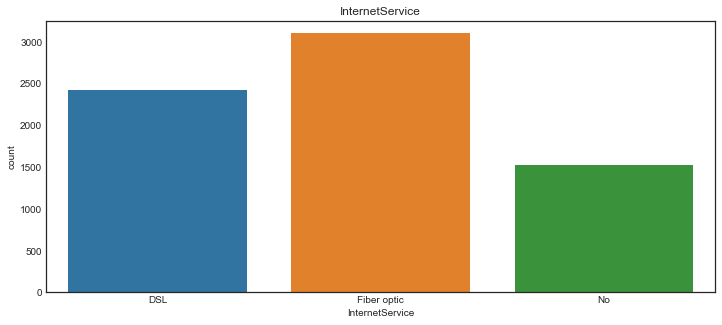

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(x="InternetService", data=df);
plt.title('InternetService')


plt.show()

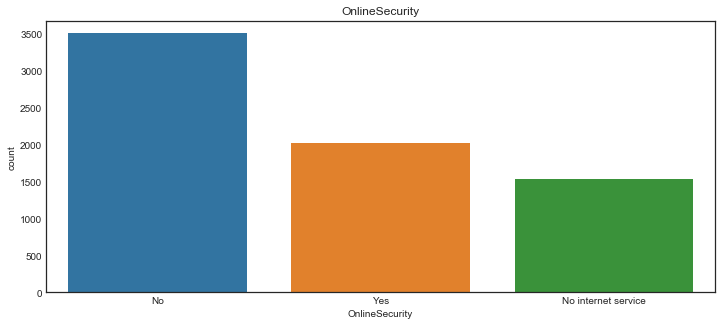

In [14]:
plt.figure(figsize=(12,5))
sns.countplot(x="OnlineSecurity", data=df);
plt.title('OnlineSecurity')


plt.show()

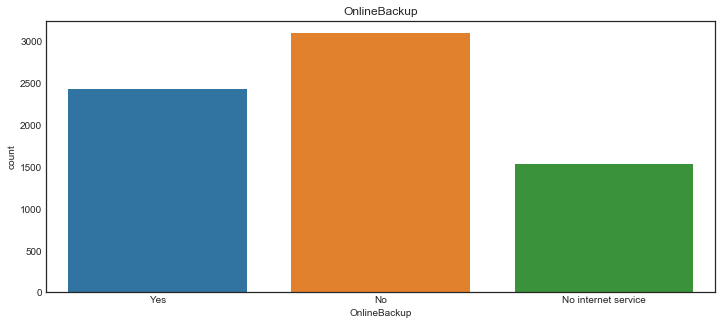

In [15]:
plt.figure(figsize=(12,5))
sns.countplot(x="OnlineBackup", data=df);
plt.title('OnlineBackup')


plt.show()

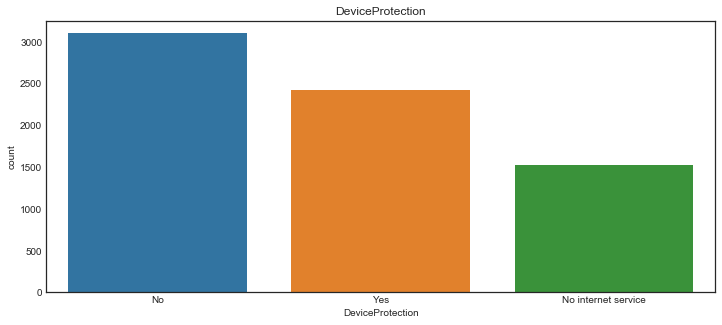

In [16]:
plt.figure(figsize=(12,5))
sns.countplot(x="DeviceProtection", data=df);
plt.title('DeviceProtection')


plt.show()

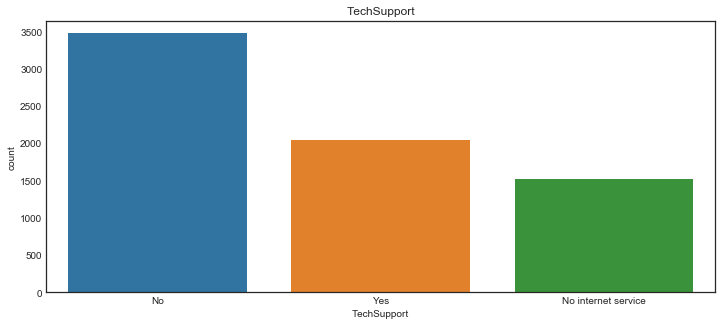

In [17]:
plt.figure(figsize=(12,5))
sns.countplot(x="TechSupport", data=df);
plt.title('TechSupport')


plt.show()

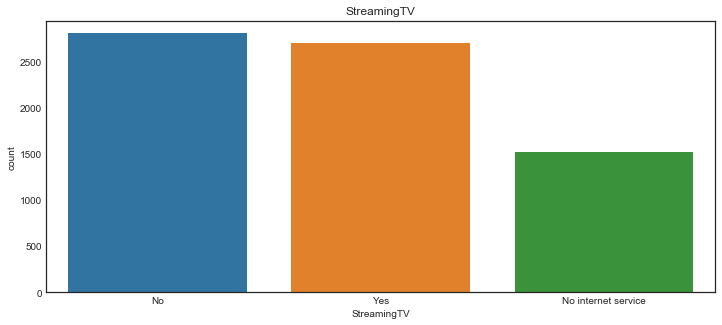

In [18]:
plt.figure(figsize=(12,5))
sns.countplot(x="StreamingTV", data=df);
plt.title('StreamingTV')


plt.show()

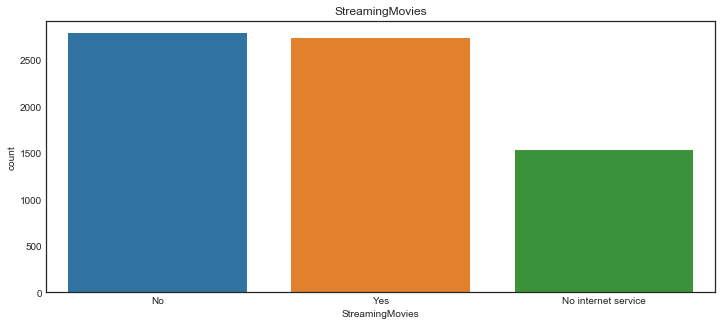

In [19]:
plt.figure(figsize=(12,5))
sns.countplot(x="StreamingMovies", data=df);
plt.title('StreamingMovies')


plt.show()

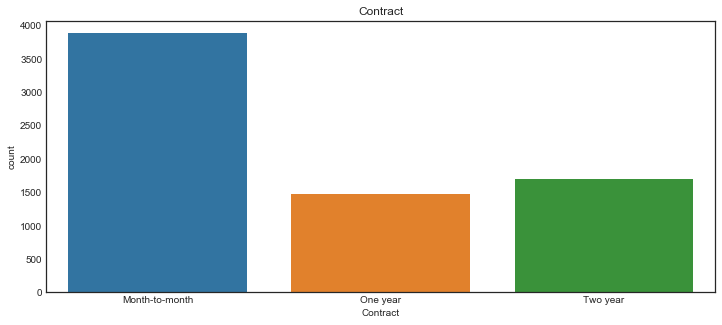

In [20]:
plt.figure(figsize=(12,5))
sns.countplot(x="Contract", data=df);
plt.title('Contract')


plt.show()

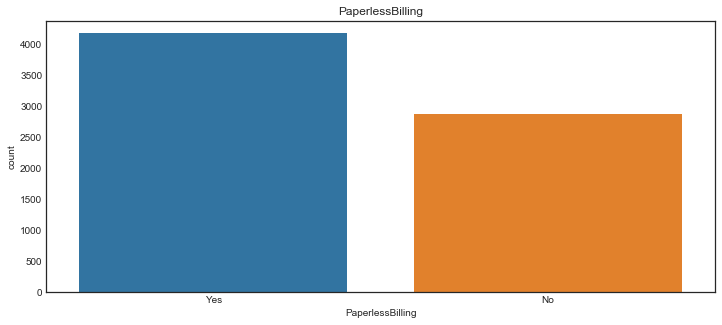

In [21]:
plt.figure(figsize=(12,5))
sns.countplot(x="PaperlessBilling", data=df);
plt.title('PaperlessBilling')


plt.show()

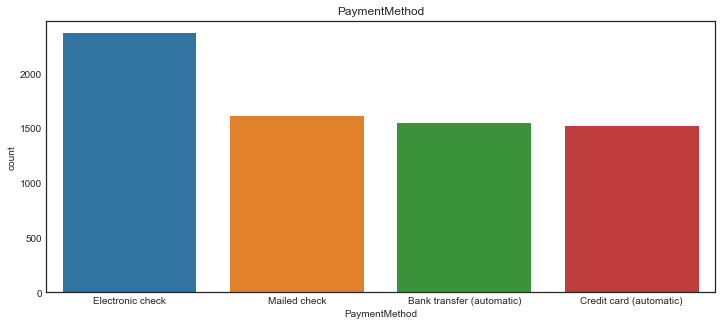

In [22]:
plt.figure(figsize=(12,5))
sns.countplot(x="PaymentMethod", data=df);
plt.title('PaymentMethod')


plt.show()

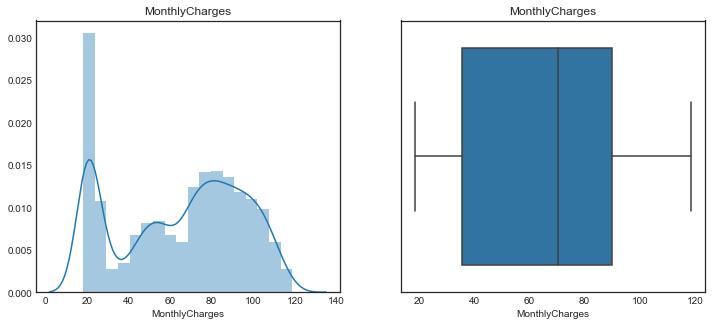

In [23]:
#number of months customer has been with the company
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['MonthlyCharges'])
plt.title('MonthlyCharges')

plt.subplot(1, 2, 2)
sns.boxplot(df['MonthlyCharges'])
plt.title('MonthlyCharges')

plt.show()

In [24]:
#for i in range(len(df)):
 #   q = float(df['TotalCharges'][i])
#    print(i, df['TotalCharges'][i])

In [25]:
df['TotalCharges'][488]

' '

In [26]:
len(df[df['TotalCharges'] == ' '])

11

In [27]:
df = df[df['TotalCharges'] != ' ']
df['TotalCharges'] = df['TotalCharges'].astype('float64')

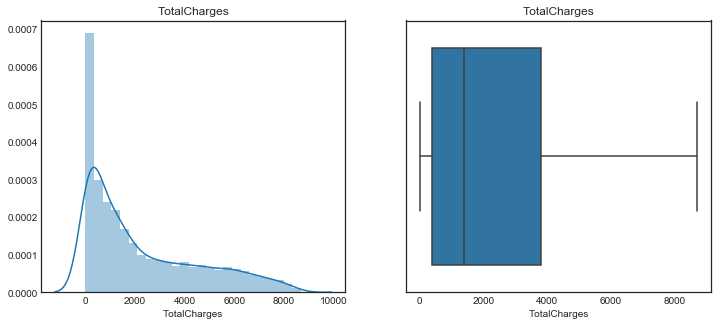

In [28]:
#number of months customer has been with the company
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['TotalCharges'])
plt.title('TotalCharges')

plt.subplot(1, 2, 2)
sns.boxplot(df['TotalCharges'])
plt.title('TotalCharges')

plt.show()

# Examine the target variable

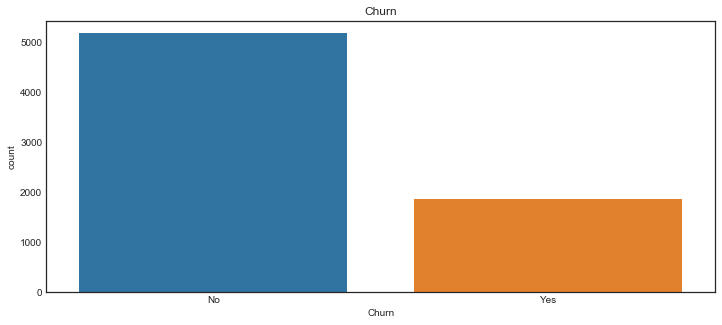

In [29]:
plt.figure(figsize=(12,5))
sns.countplot(x="Churn", data=df);
plt.title('Churn')


plt.show()

In [30]:
len(df[df['Churn'] == 'Yes'])

1869

In [31]:
len(df[df['Churn'] == 'No']) / len(df)

0.7342150170648464

### Benchmark of 0.734

### try undersampling to combat imbalance

In [32]:
df = df[df['SeniorCitizen'] == 0 ]

In [33]:
df = df[df['PhoneService'] == 'Yes' ]

In [34]:
df.shape

(5314, 21)

In [35]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df[df['Churn']=='No']
df_minority = df[df['Churn']=='Yes']

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=1267,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.Churn.value_counts()


Yes    1267
No     1267
Name: Churn, dtype: int64

### Benchmark of .5
# Feature Engineering and Selection

In [36]:
#Create dummies
df = pd.get_dummies(data=df, columns=['gender', 'Partner', 'Dependents','MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])
X = df.drop(['customerID', 'Churn', 'SeniorCitizen', 'PhoneService'], axis=1)
df['Churn'] = np.where(df['Churn'] == 'No', 0, 1)
y = df['Churn'].values.reshape(-1, 1)

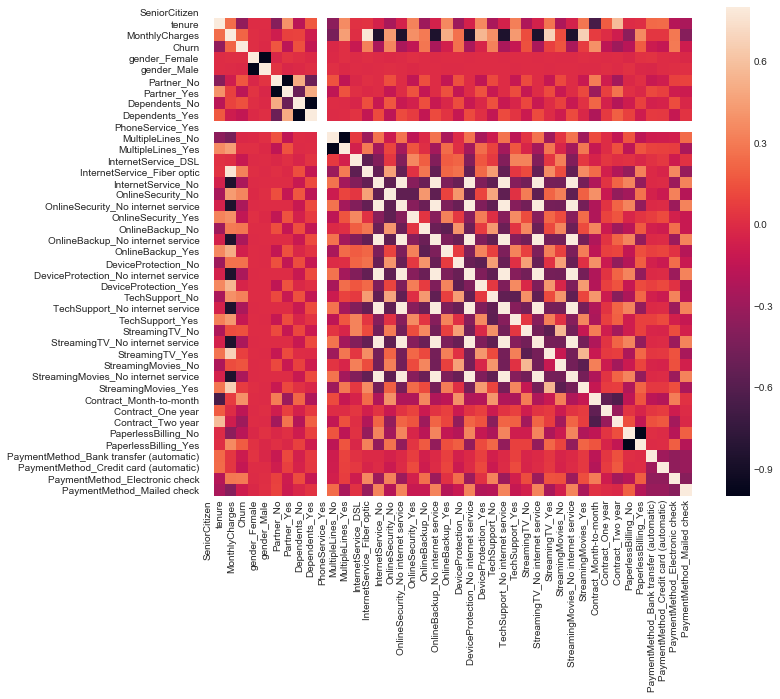

In [128]:
corrmat = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5314 entries, 1 to 7042
Data columns (total 41 columns):
tenure                                     5314 non-null int64
MonthlyCharges                             5314 non-null float64
TotalCharges                               5314 non-null float64
gender_Female                              5314 non-null uint8
gender_Male                                5314 non-null uint8
Partner_No                                 5314 non-null uint8
Partner_Yes                                5314 non-null uint8
Dependents_No                              5314 non-null uint8
Dependents_Yes                             5314 non-null uint8
MultipleLines_No                           5314 non-null uint8
MultipleLines_Yes                          5314 non-null uint8
InternetService_DSL                        5314 non-null uint8
InternetService_Fiber optic                5314 non-null uint8
InternetService_No                         5314 non-null uint8
OnlineS

# Initialize and fit model 

# Naive Bayes

In [60]:
start_time = time.clock()
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(X, y)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(X)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    df.shape[0],
    (y_pred != df['Churn']).sum().sum()
))
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

Number of mislabeled points out of a total 5314 points : 1513

Runtime: 0.02 seconds


In [41]:
cross_val_score(bnb, X, y, cv=10)

array([0.72180451, 0.72744361, 0.71052632, 0.7424812 , 0.72556391,
       0.68045113, 0.71428571, 0.69811321, 0.73018868, 0.69433962])

# KNN

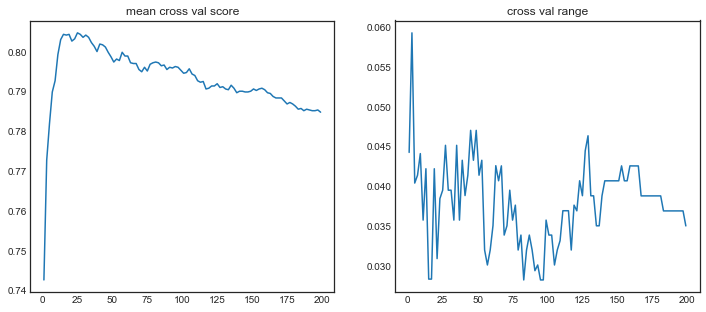

In [42]:
no_neighbors = []
for i in range(1, 200, 2):
    neighbors = KNeighborsClassifier(n_neighbors=i)
    neighbors.fit(X,y)    
    score = cross_val_score(neighbors, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()

    no_neighbors.append([i, mean_score, score_range])

no_neighbors = pd.DataFrame(no_neighbors)
no_neighbors.columns = ['k', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(no_neighbors.k, no_neighbors.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(no_neighbors.k, no_neighbors.score_range)
plt.title('cross val range')

plt.show()

In [43]:
no_neighbors[no_neighbors['mean_score'] == no_neighbors['mean_score'].max()]

,k,mean_score,score_range
12,25,0.804662,0.039474


In [44]:
no_neighbors[no_neighbors['score_range'] == no_neighbors['score_range'].min()]

,k,mean_score,score_range
41,83,0.79714,0.028195


In [45]:
neighbors = KNeighborsClassifier(n_neighbors=23)
neighbors.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='uniform')

In [46]:
cross_val_score(neighbors, X, y, cv=10)

array([0.80639098, 0.80451128, 0.80451128, 0.78759398, 0.81015038,
       0.79323308, 0.82142857, 0.78301887, 0.81509434, 0.80566038])

In [47]:
neighbors = KNeighborsClassifier(n_neighbors=29)
neighbors.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=29, p=2,
           weights='uniform')

In [48]:
cross_val_score(neighbors, X, y, cv=10)

array([0.81203008, 0.79887218, 0.80075188, 0.78195489, 0.80263158,
       0.80827068, 0.82142857, 0.78490566, 0.81698113, 0.80754717])

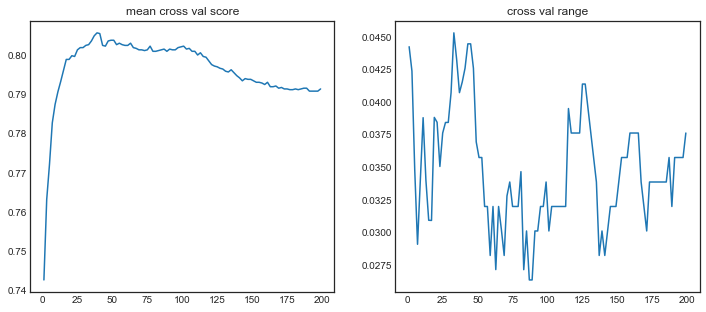

In [49]:
#with distance weighting
no_neighbors = []
for i in range(1, 200, 2):
    neighbors = KNeighborsClassifier(n_neighbors=i, weights='distance')
    neighbors.fit(X,y)    
    score = cross_val_score(neighbors, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()

    no_neighbors.append([i, mean_score, score_range])

no_neighbors = pd.DataFrame(no_neighbors)
no_neighbors.columns = ['k', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(no_neighbors.k, no_neighbors.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(no_neighbors.k, no_neighbors.score_range)
plt.title('cross val range')

plt.show()

In [50]:
no_neighbors[no_neighbors['mean_score'] == no_neighbors['mean_score'].max()]

,k,mean_score,score_range
19,39,0.805613,0.041509


In [48]:
#confusion matrix
neighbors = KNeighborsClassifier(n_neighbors=23)
y_pred = neighbors.fit(X,y).predict(X)

confusion_matrix(y, y_pred)

array([[4816,  347],
       [1072,  797]], dtype=int64)

In [49]:
confusion = confusion_matrix(y, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 347
Type 2 error (false negative): 1072
Sensitivity: 0.42643124665596577
Specificity: 0.9327910129769514


# Decision Tree

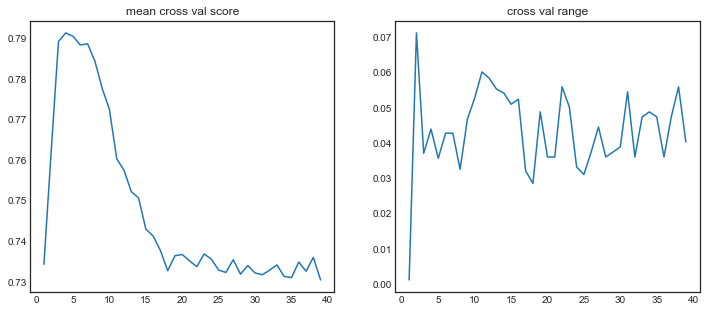

In [50]:
param_tune = []
for i in range(1, 40):
    decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    decision_tree.fit(X, y)
    score = cross_val_score(decision_tree, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')

plt.show()

In [51]:
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
3,4,0.791241,0.043827


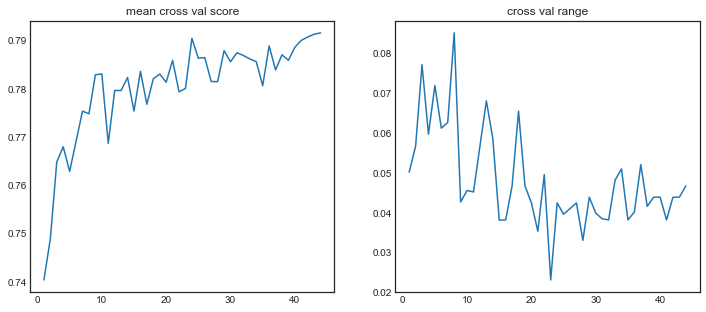

In [52]:
param_tune = []
for i in range(1, 45):
    decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=i)
    decision_tree.fit(X, y)
    score = cross_val_score(decision_tree, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')

plt.show()

In [53]:
#The default 'None' max features is performing best
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
43,44,0.791526,0.046676


In [54]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',  max_depth=4)
y_pred = decision_tree.fit(X, y).predict(X)

confusion_matrix(y, y_pred)

array([[4673,  490],
       [ 950,  919]], dtype=int64)

In [55]:
confusion = confusion_matrix(y, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 490
Type 2 error (false negative): 950
Sensitivity: 0.4917067950775816
Specificity: 0.905093937633159


In [56]:
cross_val_score(decision_tree, X, y, cv=10)

array([0.79545455, 0.80823864, 0.78267045, 0.79516358, 0.77809388,
       0.76671408, 0.80369844, 0.78378378, 0.78805121, 0.81054131])

# Random Forest

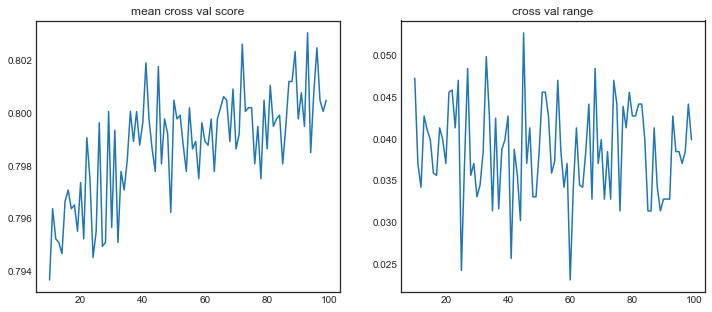

In [57]:
#Tune number of estimators
param_tune = []
for i in np.arange(10, 100):
    rfc = ensemble.RandomForestClassifier(n_estimators=i, max_depth=8, max_features=None)
    rfc.fit(X, y)
    score = cross_val_score(rfc, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')

plt.show()

In [58]:
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
83,93,0.803042,0.042674


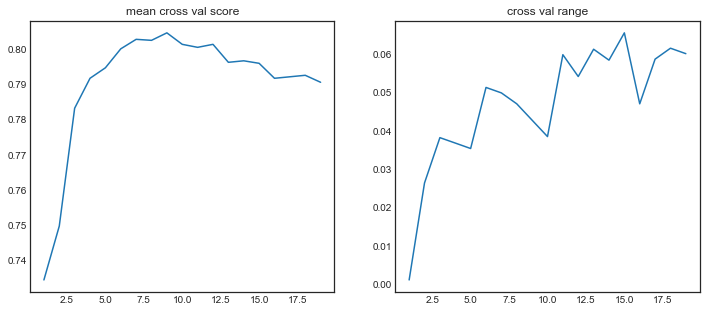

In [59]:
#Tune max depth with 93 estimators
param_tune = []
for i in np.arange(1, 20):
    rfc = ensemble.RandomForestClassifier(n_estimators=93, max_depth=i)
    rfc.fit(X, y)
    score = cross_val_score(rfc, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')

plt.show()

In [60]:
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
8,9,0.804607,0.042674


In [61]:
# tume max features
param_tune = []
for i in [None, 'sqrt', 'log2']:
    rfc = ensemble.RandomForestClassifier(n_estimators=93, max_depth=9, max_features=i)
    rfc.fit(X, y)
    score = cross_val_score(rfc, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

param_tune

,parameter,mean_score,score_range
0,None,0.800198,0.039829
1,sqrt,0.805035,0.056899
2,log2,0.805034,0.049787


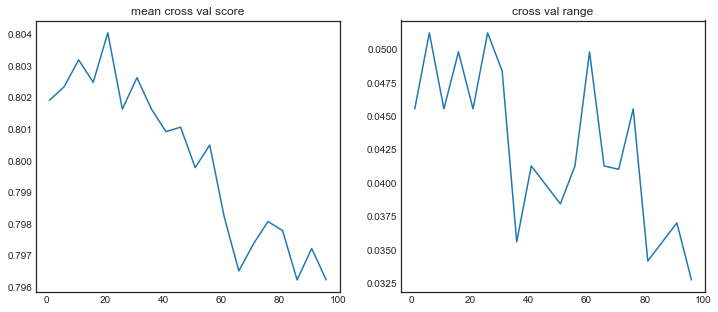

In [65]:
# tune min sample leaf
param_tune = []
for i in np.arange(1, 100, 5):
    rfc = ensemble.RandomForestClassifier(n_estimators=93, max_depth=9, max_features='sqrt', min_samples_leaf=i)
    rfc.fit(X, y)
    score = cross_val_score(rfc, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')

plt.show()

In [66]:
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
4,21,0.804039,0.045519


In [67]:
rfc = ensemble.RandomForestClassifier(n_estimators=93, max_depth=9, max_features='sqrt', min_samples_leaf=21)
cross_val_score(rfc, X, y, cv=10)

array([0.80397727, 0.80539773, 0.79971591, 0.81934566, 0.78236131,
       0.77951636, 0.82503556, 0.80227596, 0.79231863, 0.82051282])

In [68]:
y_pred = rfc.fit(X, y).predict(X)

confusion_matrix(y, y_pred)

array([[4760,  403],
       [ 884,  985]], dtype=int64)

In [69]:
confusion = confusion_matrix(y, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 403
Type 2 error (false negative): 884
Sensitivity: 0.527019796682718
Specificity: 0.9219446058493124


# Logistic Regression

In [70]:
lr = LogisticRegression(C=1e9)
                      
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y = lr.predict(X)

print('\n Percentage accuracy')
print(lr.score(X, y))

confusion_matrix(y, y_pred)

Coefficients
[[ 2.45937997e-01 -6.06340713e-02  2.28630103e-03  3.15995220e-04
  -5.34465463e-02 -8.09900208e-02 -8.70881034e-02 -4.73484637e-02
   1.82336997e-02 -1.52670267e-01  1.12989475e-01 -2.47426042e-01
  -2.43591885e-01  1.12989475e-01 -3.83415748e-03 -3.57944642e-01
   3.26838071e-01 -1.03329996e-01  2.24434685e-01 -1.03329996e-01
  -2.55541256e-01  8.59659855e-02 -1.03329996e-01 -1.17072557e-01
   2.25460218e-02 -1.03329996e-01 -5.36525929e-02  2.27234931e-01
  -1.03329996e-01 -2.58341502e-01 -1.03985298e-01 -1.03329996e-01
   7.28787274e-02 -1.08456339e-01 -1.03329996e-01  7.73497682e-02
   4.94943050e-01 -1.90035469e-01 -4.39344147e-01 -2.41640328e-01
   1.07203761e-01 -8.18215684e-02 -1.70050162e-01  2.68734426e-01
  -1.51299263e-01]]
[-0.13443657]

 Percentage accuracy
0.8056029579067122


array([[4760,  403],
       [ 884,  985]], dtype=int64)

In [71]:
confusion = confusion_matrix(y, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 403
Type 2 error (false negative): 884
Sensitivity: 0.527019796682718
Specificity: 0.9219446058493124


In [72]:
feature_rank = pd.DataFrame({'features': X.columns, 'coefficients': fit.coef_.flatten()})
feature_rank['absolute_coef'] = feature_rank['coefficients'].abs()
feature_rank.sort_values(by=['absolute_coef'], inplace=True, ascending=False)
feature_rank = feature_rank.reset_index(drop=True)
feature_rank

,features,coefficients,absolute_coef
0,Contract_Month-to-month,0.494943,0.494943
1,Contract_Two year,-0.439344,0.439344
2,InternetService_DSL,-0.357945,0.357945
3,InternetService_Fiber optic,0.326838,0.326838
4,PaymentMethod_Electronic check,0.268734,0.268734
5,TechSupport_Yes,-0.258342,0.258342
6,OnlineSecurity_Yes,-0.255541,0.255541
7,PhoneService_Yes,-0.247426,0.247426
8,SeniorCitizen,0.245938,0.245938
9,MultipleLines_No,-0.243592,0.243592


In [73]:
cross_val_score(lr, X, y, cv=10)

array([0.79403409, 0.81392045, 0.80539773, 0.81792319, 0.78093883,
       0.79658606, 0.81223329, 0.81081081, 0.79800853, 0.80626781])

# Logistic Regression with Ridge Regularization

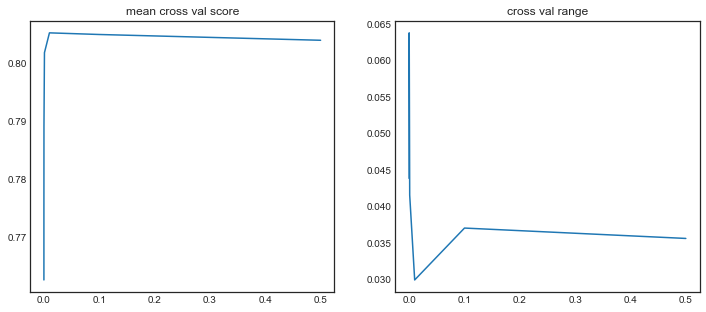

In [74]:
# tune l2 regularization
param_tune = []
for i in [0.000001, 0.00001, 0.0001, 0.001, 0.001, 0.01, 0.1, 0.5]:
    ridge = LogisticRegression(penalty='l2', C=i)
    ridge.fit(X, y)
    score = cross_val_score(ridge, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')

plt.show()

In [75]:
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
5,0.01,0.805176,0.029872


In [76]:
ridge = LogisticRegression(penalty='l2', C=0.01)
                      
fit = ridge.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
y_pred = ridge.predict(X)

print('\n Percentage accuracy')
print(ridge.score(X, y))

confusion_matrix(y, y_pred)

Coefficients
[[ 0.18059098 -0.0681136   0.00452356  0.00035434 -0.04690531 -0.06672353
  -0.06967654 -0.04395231  0.01523778 -0.12886662  0.07461966 -0.1882485
  -0.20976882  0.07461966  0.02152032 -0.25399225  0.23851994 -0.09815654
   0.18411821 -0.09815654 -0.19959051  0.07140798 -0.09815654 -0.08688028
   0.03194047 -0.09815654 -0.04741277  0.18988274 -0.09815654 -0.20535505
  -0.06813271 -0.09815654  0.05266041 -0.07141388 -0.09815654  0.05594157
   0.30985044 -0.14102176 -0.28245753 -0.21106214  0.0974333  -0.06518751
  -0.12096445  0.21505815 -0.14253504]]
[-0.11362884]

 Percentage accuracy
0.8064562002275313


array([[4663,  500],
       [ 861, 1008]], dtype=int64)

In [77]:
cross_val_score(ridge, X, y, cv=10)

array([0.80255682, 0.80965909, 0.80255682, 0.81650071, 0.78662873,
       0.79800853, 0.81365576, 0.81365576, 0.80512091, 0.8034188 ])

In [78]:
confusion = confusion_matrix(y, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 500
Type 2 error (false negative): 861
Sensitivity: 0.5393258426966292
Specificity: 0.9031570792175092


# Logistic Regression with Lasso Regularization

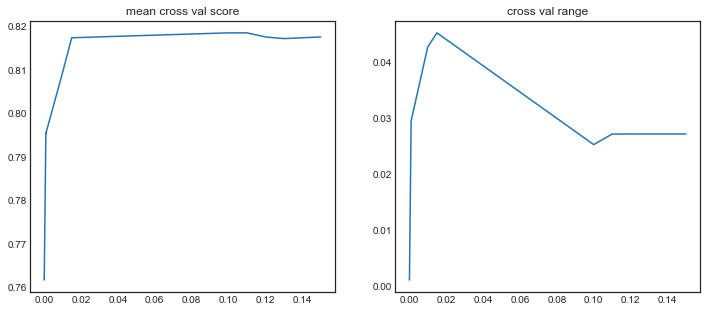

In [51]:
# tune l1 regularization
param_tune = []
for i in [0.000001, 0.00001, 0.0001, 0.001, 0.001, 0.01, 0.015, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15]:
    lasso = LogisticRegression(penalty='l1', C=i)
    lasso.fit(X, y)
    score = cross_val_score(lasso, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')

plt.show()

In [52]:
param_tune

,parameter,mean_score,score_range
0,0.000001,0.761574,0.000986
1,0.000010,0.761574,0.000986
2,0.000100,0.761574,0.000986
3,0.001000,0.795453,0.029359
4,0.001000,0.795265,0.029359
5,0.010000,0.809189,0.042588
6,0.015000,0.817275,0.045113
7,0.100000,0.818403,0.025153
8,0.110000,0.818401,0.027039
9,0.120000,0.817461,0.027046


In [53]:
lasso = LogisticRegression(penalty='l1', C=0.1)
                      
fit = lasso.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
y_pred = lasso.predict(X)

print('\n Percentage accuracy')
print(lasso.score(X, y))

confusion_matrix(y, y_pred)

Coefficients
[[-8.51351361e-02  1.09003593e-03  5.45942677e-04  0.00000000e+00
  -3.12875785e-02  0.00000000e+00 -3.42188248e-02  0.00000000e+00
  -1.67861346e-02 -2.21406549e-01  0.00000000e+00 -4.87642969e-01
   2.20737726e-01 -1.58660527e-04  3.29977038e-01  0.00000000e+00
  -5.85261210e-02  5.46150783e-02 -7.10237716e-01 -1.10866411e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.78093945e-01
   0.00000000e+00 -1.06391189e-01 -6.90490571e-02 -1.16795727e-05
   5.07610189e-03 -6.00224815e-07  0.00000000e+00  6.84072372e-03
   1.78376054e-01 -1.96994204e-01 -7.47988106e-01 -3.06504561e-01
   0.00000000e+00  0.00000000e+00 -7.61839995e-02  3.00943657e-01
  -8.47609740e-02]]
[-0.02231661]

 Percentage accuracy
0.8202860368837034


array([[3723,  324],
       [ 631,  636]], dtype=int64)

In [54]:
confusion = confusion_matrix(y, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 324
Type 2 error (false negative): 631
Sensitivity: 0.5019731649565904
Specificity: 0.9199406968124537


In [55]:
cross_val_score(lasso, X, y, cv=10)

array([0.82142857, 0.81766917, 0.81390977, 0.81766917, 0.81015038,
       0.81015038, 0.83458647, 0.81320755, 0.82830189, 0.80943396])

In [56]:
feature_rank = pd.DataFrame({'features': X.columns, 'coefficients': fit.coef_.flatten()})
feature_rank['absolute_coef'] = feature_rank['coefficients'].abs()
feature_rank.sort_values(by=['absolute_coef'], inplace=True, ascending=False)
feature_rank = feature_rank.reset_index(drop=True)
feature_rank

,features,coefficients,absolute_coef
0,Contract_Two year,-7.479881e-01,7.479881e-01
1,OnlineBackup_No internet service,-7.102377e-01,7.102377e-01
2,InternetService_DSL,-4.876430e-01,4.876430e-01
3,OnlineSecurity_No,3.299770e-01,3.299770e-01
4,PaperlessBilling_No,-3.065046e-01,3.065046e-01
5,PaymentMethod_Electronic check,3.009437e-01,3.009437e-01
6,MultipleLines_No,-2.214065e-01,2.214065e-01
7,InternetService_Fiber optic,2.207377e-01,2.207377e-01
8,Contract_One year,-1.969942e-01,1.969942e-01
9,Contract_Month-to-month,1.783761e-01,1.783761e-01


# SVM

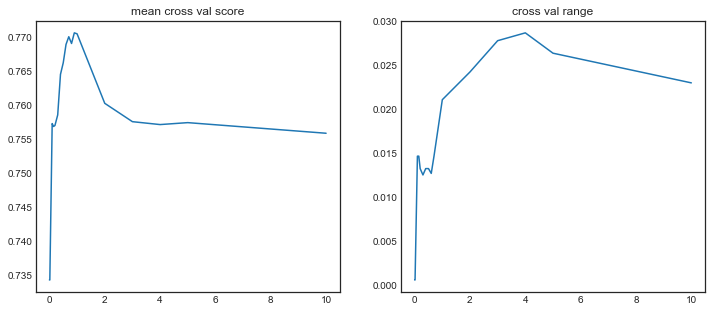

In [85]:
# tune C parameter
param_tune = []
for i in [0.000001, 0.00001, 0.0001, 0.001, 0.001, 0.01, 0.015, 0.1, 0.15, .2, .3, .4, .5, .6, .7, .8, .9, 1, 2, 3, 4, 5, 10]:
    svm = SVC(C=i)    
    svm.fit(X, y)
    score = cross_val_score(svm, X, y, cv=5)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')

plt.show()

In [86]:
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
16,0.9,0.770624,0.018878


In [87]:
# tune 
#param_tune = []
#for i in ['linear', 'poly', 'rbf']:
#    svm = SVC(C=.9, kernel=i)    
#    svm.fit(X, y)
#    score = cross_val_score(svm, X, y, cv=5)
#    mean_score = score.mean()
#    score_range = score.max() - score.min()
#    param_tune.append([i, mean_score, score_range])

#param_tune = pd.DataFrame(param_tune)
#param_tune.columns = ['parameter', 'mean_score', 'score_range']

#param_tune

In [88]:
#svm = SVC(C=.9, kernel='poly')
#cross_val_score(svm, X, y, cv=3)

In [89]:
y_1d = df['Churn']
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.grid_scores_

In [90]:
svc_param_selection(X, y_1d, 5)

[mean: 0.73422, std: 0.00017, params: {'C': 0.001, 'gamma': 0.001},
 mean: 0.73422, std: 0.00017, params: {'C': 0.001, 'gamma': 0.01},
 mean: 0.73422, std: 0.00017, params: {'C': 0.001, 'gamma': 0.1},
 mean: 0.73422, std: 0.00017, params: {'C': 0.001, 'gamma': 1},
 mean: 0.75398, std: 0.00465, params: {'C': 0.01, 'gamma': 0.001},
 mean: 0.73422, std: 0.00017, params: {'C': 0.01, 'gamma': 0.01},
 mean: 0.73422, std: 0.00017, params: {'C': 0.01, 'gamma': 0.1},
 mean: 0.73422, std: 0.00017, params: {'C': 0.01, 'gamma': 1},
 mean: 0.76934, std: 0.00710, params: {'C': 0.1, 'gamma': 0.001},
 mean: 0.75739, std: 0.00505, params: {'C': 0.1, 'gamma': 0.01},
 mean: 0.75100, std: 0.00439, params: {'C': 0.1, 'gamma': 0.1},
 mean: 0.73436, std: 0.00032, params: {'C': 0.1, 'gamma': 1},
 mean: 0.78498, std: 0.00620, params: {'C': 1, 'gamma': 0.001},
 mean: 0.77090, std: 0.00459, params: {'C': 1, 'gamma': 0.01},
 mean: 0.76294, std: 0.00465, params: {'C': 1, 'gamma': 0.1},
 mean: 0.74133, std: 0.00343

In [91]:
svm = SVC(C=1, kernel='rbf', gamma=0.001)
cross_val_score(svm, X, y, cv=3)

array([0.78114334, 0.77474403, 0.7862628 ])

In [22]:
svm = SVC(C=.9, kernel='linear')
cross_val_score(svm, X, y, cv=3)

array([0.79180887, 0.78882253, 0.80290102])

In [24]:
y_pred = svm.fit(X, y).predict(X)

confusion_matrix(y, y_pred)

array([[4773,  390],
       [1037,  832]], dtype=int64)

In [25]:
confusion = confusion_matrix(y, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 390
Type 2 error (false negative): 1037
Sensitivity: 0.4451578384162654
Specificity: 0.9244625217896572


# Gradient Boost 

In [12]:
y_1d = df['Churn']
# Find number of estimators
param_test1 = {'n_estimators':np.arange(1, 150), 'max_depth': np.arange(2,16)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_features='sqrt',subsample=0.8), 
param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X,y_1d)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.73422, std: 0.00017, params: {'max_depth': 2, 'n_estimators': 1},
  mean: 0.73422, std: 0.00017, params: {'max_depth': 2, 'n_estimators': 2},
  mean: 0.73422, std: 0.00017, params: {'max_depth': 2, 'n_estimators': 3},
  mean: 0.73422, std: 0.00017, params: {'max_depth': 2, 'n_estimators': 4},
  mean: 0.73422, std: 0.00017, params: {'max_depth': 2, 'n_estimators': 5},
  mean: 0.73422, std: 0.00017, params: {'max_depth': 2, 'n_estimators': 6},
  mean: 0.73422, std: 0.00017, params: {'max_depth': 2, 'n_estimators': 7},
  mean: 0.73422, std: 0.00017, params: {'max_depth': 2, 'n_estimators': 8},
  mean: 0.73422, std: 0.00017, params: {'max_depth': 2, 'n_estimators': 9},
  mean: 0.73422, std: 0.00017, params: {'max_depth': 2, 'n_estimators': 10},
  mean: 0.74929, std: 0.00844, params: {'max_depth': 2, 'n_estimators': 11},
  mean: 0.74232, std: 0.01097, params: {'max_depth': 2, 'n_estimators': 12},
  mean: 0.75682, std: 0.01215, params: {'max_depth': 2, 'n_estimators': 13},
  mean: 

In [13]:
param_test2 = {'min_samples_split': np.arange(50,1001,10)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=110, max_depth=3, min_samples_leaf=50, max_features='sqrt', subsample=0.8), 
param_grid = param_test2, scoring='accuracy', n_jobs=4, iid=False, cv=5)
gsearch2.fit(X,y_1d)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.80688, std: 0.00747, params: {'min_samples_split': 50},
  mean: 0.80660, std: 0.00861, params: {'min_samples_split': 60},
  mean: 0.80489, std: 0.00786, params: {'min_samples_split': 70},
  mean: 0.80518, std: 0.00862, params: {'min_samples_split': 80},
  mean: 0.80788, std: 0.00855, params: {'min_samples_split': 90},
  mean: 0.80660, std: 0.00871, params: {'min_samples_split': 100},
  mean: 0.80276, std: 0.00721, params: {'min_samples_split': 110},
  mean: 0.80489, std: 0.00902, params: {'min_samples_split': 120},
  mean: 0.80333, std: 0.00751, params: {'min_samples_split': 130},
  mean: 0.80304, std: 0.00762, params: {'min_samples_split': 140},
  mean: 0.80461, std: 0.00854, params: {'min_samples_split': 150},
  mean: 0.80589, std: 0.00609, params: {'min_samples_split': 160},
  mean: 0.80589, std: 0.00843, params: {'min_samples_split': 170},
  mean: 0.80503, std: 0.01169, params: {'min_samples_split': 180},
  mean: 0.80376, std: 0.00792, params: {'min_samples_split': 190},


In [17]:
param_test3 = {'min_samples_leaf': np.arange(20,71)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=210, n_estimators=110, max_depth=3, max_features='sqrt', subsample=0.8), 
param_grid = param_test3, scoring='accuracy', n_jobs=4, iid=False, cv=5)
gsearch3.fit(X,y_1d)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.80532, std: 0.00857, params: {'min_samples_leaf': 20},
  mean: 0.80688, std: 0.00866, params: {'min_samples_leaf': 21},
  mean: 0.80290, std: 0.00762, params: {'min_samples_leaf': 22},
  mean: 0.80404, std: 0.00721, params: {'min_samples_leaf': 23},
  mean: 0.80560, std: 0.00827, params: {'min_samples_leaf': 24},
  mean: 0.80560, std: 0.01039, params: {'min_samples_leaf': 25},
  mean: 0.80390, std: 0.00857, params: {'min_samples_leaf': 26},
  mean: 0.80375, std: 0.00847, params: {'min_samples_leaf': 27},
  mean: 0.80376, std: 0.00825, params: {'min_samples_leaf': 28},
  mean: 0.80745, std: 0.00935, params: {'min_samples_leaf': 29},
  mean: 0.80475, std: 0.00654, params: {'min_samples_leaf': 30},
  mean: 0.80631, std: 0.00777, params: {'min_samples_leaf': 31},
  mean: 0.80432, std: 0.00963, params: {'min_samples_leaf': 32},
  mean: 0.80475, std: 0.00544, params: {'min_samples_leaf': 33},
  mean: 0.80617, std: 0.00969, params: {'min_samples_leaf': 34},
  mean: 0.80390, std: 0.0

In [26]:
param_test5 = {'subsample':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=110,max_depth=3,min_samples_split=210, min_samples_leaf=45,max_features='sqrt'),
param_grid = param_test5, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X,y_1d)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.80347, std: 0.00746, params: {'subsample': 0.5},
  mean: 0.80390, std: 0.00853, params: {'subsample': 0.55},
  mean: 0.80333, std: 0.00938, params: {'subsample': 0.6},
  mean: 0.80575, std: 0.01050, params: {'subsample': 0.65},
  mean: 0.80262, std: 0.00925, params: {'subsample': 0.7},
  mean: 0.80247, std: 0.00751, params: {'subsample': 0.75},
  mean: 0.80418, std: 0.01098, params: {'subsample': 0.8},
  mean: 0.80461, std: 0.00902, params: {'subsample': 0.85},
  mean: 0.80631, std: 0.00783, params: {'subsample': 0.9},
  mean: 0.80617, std: 0.00912, params: {'subsample': 0.95},
  mean: 0.80546, std: 0.01135, params: {'subsample': 1}],
 {'subsample': 0.9},
 0.8063146583065064)

In [27]:
clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=110, max_depth=3, min_samples_split=210, min_samples_leaf=45,max_features='sqrt',subsample=0.8)
cross_val_score(clf, X, y_1d, cv=10, scoring='accuracy')

array([0.80965909, 0.81392045, 0.80255682, 0.82503556, 0.78805121,
       0.78662873, 0.83072546, 0.78805121, 0.79374111, 0.81196581])

In [28]:
y_pred = clf.fit(X, y_1d).predict(X)

confusion_matrix(y, y_pred)

array([[4708,  455],
       [ 830, 1039]], dtype=int64)

In [29]:
confusion = confusion_matrix(y, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 455
Type 2 error (false negative): 830
Sensitivity: 0.555912252541466
Specificity: 0.9118729420879333
